In [61]:
import sys
sys.path.append('../../utils/')
from cmptTheoreticalEmitGrowth import *
from bunchLengthConversions import *
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt

### Plotting parameters

In [62]:
params = {'legend.fontsize': 20,
          'figure.figsize': (9.5, 8.5),
          'axes.labelsize': 27,
          'axes.titlesize': 23,
          'xtick.labelsize': 27,
          'ytick.labelsize': 27,
          'image.cmap': 'jet',
          'lines.linewidth': 1,
          'lines.markersize': 10,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

### Study parameters

In [63]:
n_runs = 3 # number of runs that the simulation was repeated

In [64]:
my_start = 400.0
my_stop = 1e4
my_step = 800

my_variables = list(np.arange(my_start, my_stop, my_step))
my_variables.insert(0, 0.0)
print(my_variables)

[0.0, 400.0, 1200.0, 2000.0, 2800.0, 3600.0, 4400.0, 5200.0, 6000.0, 6800.0, 7600.0, 8400.0, 9200.0]


### Load data

In [66]:
path_to_data = './'
#study_name = 'deyRates_sps_270GeV_CC_PN1e-8_1e5turns_5e5Nb_Nowakefields_ayyScan'
study_name = 'deyRates_sps_270GeV_CC_PN1e-8_1e5turns_5e5Nb_wakefieldsON_500slices_ayyScan'
noise_type = 'PN'

my_df = pickle.load( open(path_to_data+study_name+'.pkl', "rb" ) )

In [67]:
my_df

,ayy_0.0,ayy_400.0,ayy_1200.0,ayy_2000.0,ayy_2800.0,ayy_3600.0,ayy_4400.0,ayy_5200.0,ayy_6000.0,ayy_6800.0,ayy_7600.0,ayy_8400.0,ayy_9200.0
m,"[1.08097754571569e-08, 1.00823914573883e-08, 8...","[1.2010767442866954e-08, 1.2364853952473491e-0...","[1.7737680398607257e-08, 9.813673463125378e-09...","[1.1251873296915003e-08, 1.5354700019465245e-0...","[1.3024405825963914e-08, 1.4313315102012334e-0...","[1.1698346797073129e-08, 1.0903848789178197e-0...","[1.1246583560779581e-08, 1.1012975397371324e-0...","[1.5657394946164117e-08, 1.6890307988116998e-0...","[1.184244149967835e-08, 1.36989769040297e-08, ...","[1.792884976798482e-08, 2.3309049392301403e-08...","[1.8796096356848233e-08, 2.369937137001642e-08...","[2.038078467430324e-08, 1.4964455880130853e-08...","[1.7622216200405047e-08, 1.7455912153224918e-0..."
b,"[2.001062224371366e-06, 2.0002094287793027e-06...","[1.9955547456527707e-06, 2.0029423025350566e-0...","[2.00182929451237e-06, 1.999643739388144e-06, ...","[2.003711425224395e-06, 1.9945867687570973e-06...","[2.001075379676508e-06, 1.9999286920365067e-06...","[2.0011434734131143e-06, 2.0009487979561597e-0...","[2.008034437808436e-06, 2.0005372412675396e-06...","[1.999468400020198e-06, 2.0000555680271295e-06...","[1.9995198279966843e-06, 2.001981264299887e-06...","[1.999267113575896e-06, 1.9932158765143225e-06...","[1.9968253228578274e-06, 1.995488882775908e-06...","[1.9986140530894686e-06, 1.9992643719096373e-0...","[2.000725348084723e-06, 2.0004251113424093e-06..."
err,"[7.58314585007433e-11, 7.035687266110894e-11, ...","[6.919830078490749e-11, 8.751535097360842e-11,...","[9.889191621996998e-11, 5.02937485945374e-11, ...","[9.377321277421609e-11, 4.9891832712647175e-11...","[7.308278992874409e-11, 9.606353717052984e-11,...","[5.5891641481015444e-11, 5.91676271726604e-11,...","[1.340931332798601e-10, 4.705194383779237e-11,...","[6.433221169542356e-11, 7.32174625193646e-11, ...","[8.510342306054616e-11, 5.589067855780267e-11,...","[7.633193517634174e-11, 1.462204954414291e-10,...","[8.66481712560023e-11, 1.6413032237529272e-10,...","[5.253109570004383e-11, 5.7509575504439033e-11...","[5.294158721003003e-11, 6.222665751872331e-11,..."


In [68]:
my_df_keys = list(my_df.keys())
print(my_df_keys)

['ayy_0.0', 'ayy_400.0', 'ayy_1200.0', 'ayy_2000.0', 'ayy_2800.0', 'ayy_3600.0', 'ayy_4400.0', 'ayy_5200.0', 'ayy_6000.0', 'ayy_6800.0', 'ayy_7600.0', 'ayy_8400.0', 'ayy_9200.0']


### Compute errors

Let's assume:

\begin{equation}
y_1 = a_1 x \pm err1 \\
y_2 = a_2 x \pm err2 \\
y_3 = a_3 x \pm err3
\end{equation}

Then the systematic error is:
\begin{equation}
systematic \ error = std({a_1, a_2, a_3})
\end{equation}

and the statistical errors:
\begin{equation}
statistical \ error = \sqrt{\langle {err_1^2, err_2^2. err_3^2} \rangle} 
\end{equation}.

The total error is:

\begin{equation}
total \ error = \sqrt{(systematic \ error)^2 + (statistical \ error)^2}
\end{equation}

In [69]:
np.array(my_df[my_df_keys[i]]['err'])**2

array([2.80281166e-21, 3.87215691e-21, 1.11409994e-20])

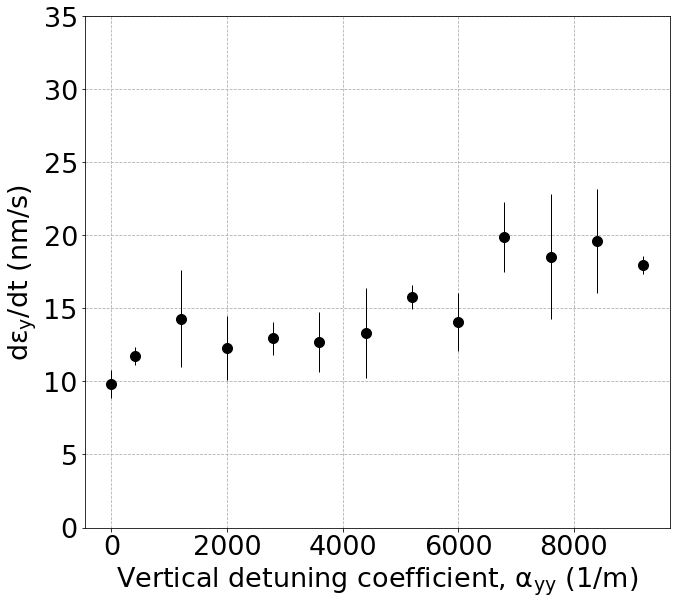

In [72]:
for i, key in enumerate(my_df_keys):
    systematic_error = np.std(my_df[my_df_keys[i]]['m'])
    statistical_error = np.sqrt(np.mean(np.array(my_df[my_df_keys[i]]['err'])**2))
    total_error = np.sqrt(systematic_error**2+statistical_error**2)
    plt.errorbar(my_variables[i], np.mean(my_df[my_df_keys[i]]['m'])*1e9, yerr=total_error*1e9, marker='o',  c='k')
    
plt.ylim(0, 35)
plt.grid(linestyle='dashed')
plt.ylabel(r'$\mathrm{d\epsilon_y / dt \ (nm/s)}$')
plt.xlabel('Vertical detuning coefficient, '+r'$\mathrm{\alpha_{yy} \ (1/m)}$')

plt.tight_layout()

savefig = False
if savefig:
    plt.savefig(f'./output/{study_name}.png', bbox_inches='tight')

### Compute the theoretically expected rate

In [73]:
# Machine parameters
betay = 73.81671646 # 73 m at CC2, 76 m at CC1
Vcc = 1e6 # V
Eb = 270e9 # eV
gamma_0 = 287.8 
beta_0 = np.sqrt(1 - 1/gamma_0**2)
circumference = 6911.5623 # m
frev = 299792458/circumference # Hz
sigma_z = 0.155 # m
f_CC = 400.789e6 # CC frequency in Hz
clight = 299792458 # m/s
# Noise kick parameters
A_phase = 1e-8 # rms kick in the simulation of the phase noise
A_amplitude = 0 # rms kick in the simulation of the amplitude noise
scale_factor = Eb/Vcc # scaling factor to rms noise, σ
# Compute the PSD in rad^2/Hz and V^2/Hz
PSD_phi = (A_phase * scale_factor)**2/frev # rad^2/Hz
#PSD_phi = 1.42e-10
#PSD_phi = 1.4e-10
PSD_A = (A_amplitude * scale_factor)**2/frev # V^2/Hz
print(f'psd phi: {PSD_phi} rad^2/Hz, psd A: {PSD_A} V^2/Hz')

psd phi: 1.6806723392287607e-10 rad^2/Hz, psd A: 0.0 V^2/Hz


In [74]:
# Compute the correction factor due to the bunch length
sigma_phi = bunch_length_m_to_rad(sigma_z, clight, f_CC)
CDeltaphi = cmpt_bunch_length_correction_factor(sigma_phi, 'PN')
CDeltaA = cmpt_bunch_length_correction_factor(sigma_phi, 'AN')
print('CDeltaPhi = {}, CDeltaA = {}'.format(CDeltaphi, CDeltaA))

if noise_type == 'PN':
    expected_growth = emit_growth_phase_noise(betay, Vcc, frev, Eb, CDeltaphi, PSD_phi, one_sided_psd=False)*beta_0*gamma_0 # m/s
    my_color = 'C0'
    fill_bewtween_color = 'lightblue'
elif noise_type == 'AN':
    expected_growth = emit_growth_amplitude_noise(betay, Vcc, frev, Eb, CDeltaA, PSD_A, one_sided_psd=False)*beta_0*gamma_0 # m/s
    my_color = 'C1'
    fill_bewtween_color = 'moccasin'
else:
    my_color = 'C2'
    expected_growth_1 = emit_growth_phase_noise(betay, Vcc, frev, Eb, CDeltaphi, PSD_phi, one_sided_psd=False)*beta_0*gamma_0 # m/s
    expected_growth_2 = emit_growth_amplitude_noise(betay, Vcc, frev, Eb, CDeltaA, PSD_A, one_sided_psd=False)*beta_0*gamma_0 # m/s
    expected_growth = expected_growth_1 + expected_growth_2

print('expected growth = {} nm/s'.format(expected_growth*1e9))

CDeltaPhi = 0.5168486015622045, CDeltaA = 0.24157569921889774
expected growth = 23.813362141833874 nm/s


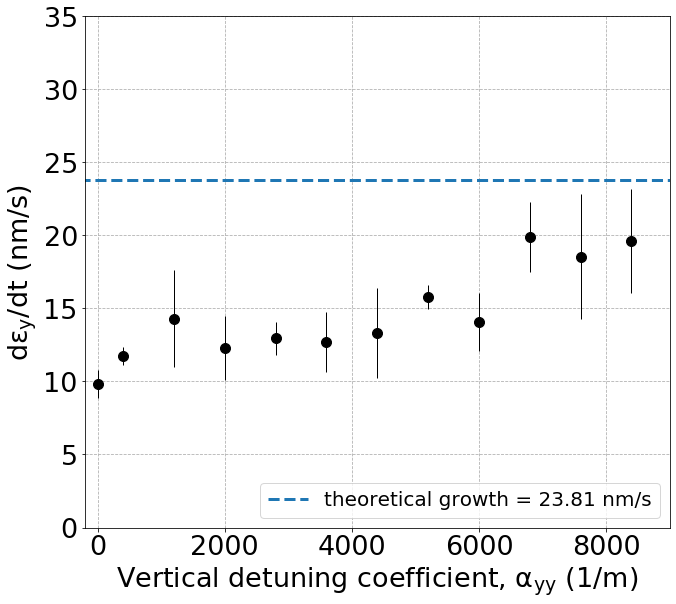

In [76]:
for i, key in enumerate(my_df_keys):
    systematic_error = np.std(my_df[my_df_keys[i]]['m'])
    statistical_error = np.sqrt(np.mean(np.array(my_df[my_df_keys[i]]['err'])**2))
    total_error = np.sqrt(systematic_error**2+statistical_error**2)
    plt.errorbar(my_variables[i], np.mean(my_df[my_df_keys[i]]['m'])*1e9, yerr=total_error*1e9, marker='o',  c='k')

plt.hlines(expected_growth*1e9, -300, 10000, linestyles='dashed', linewidth=3, color='C0', label=f'theoretical growth = {expected_growth*1e9:.2f} nm/s')

plt.xlim(-200, 9000)
plt.ylim(0, 35)

plt.grid(linestyle='dashed')
plt.ylabel(r'$\mathrm{d\epsilon_y / dt \ (nm/s)}$')
plt.xlabel('Vertical detuning coefficient, '+r'$\mathrm{\alpha_{yy} \ (1/m)}$')

plt.legend(loc = 4)

plt.tight_layout()

savefig = False
if savefig:
    plt.savefig(f'./output/{study_name}_vsTheory.png', bbox_inches='tight')